<a href="https://colab.research.google.com/github/Rathod-shubhamm/boilerplate-page-view-time-series-visualizer/blob/main/google_search__data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
pd = pd.read_csv("/content/drive/MyDrive/Untitled folder/fcc-forum-pageviews.csv",index_col = "date" , parse_dates = True)
print(pd)

             value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]


In [1]:
pip install pytrends


In [2]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
Trending_topics = TrendReq(hl='en-US', tz=360)


In [3]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')



In [4]:
Trending_topics.build_payload(kw_list=["Cloud Computing"],
                              cat=0, timeframe='today 12-m')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)



            Cloud Computing  isPartial
date                                  
2023-12-03              100      False
2023-12-10               90      False
2023-11-26               89      False
2023-10-08               86      False
2024-01-28               84      False
2024-02-04               82      False
2024-03-17               82      False
2024-02-25               82      False
2023-12-17               82      False
2024-05-05               80      False


In [5]:
kw_list = ["Cloud Computing"]
Trending_topics.build_payload(kw_list, cat=0, timeframe='2018-01-01 2018-02-01', geo='', gprop='')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)



            Cloud Computing  isPartial
date                                  
2018-01-30              100      False
2018-02-01               96      False
2018-01-18               96      False
2018-01-08               95      False
2018-01-10               91      False
2018-01-04               90      False
2018-01-24               90      False
2018-01-11               90      False
2018-01-22               89      False
2018-01-09               89      False


In [6]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing",
                        ascending = False)
data = data.head(10)
print(data)


            Cloud Computing
geoName                    
Ethiopia                100
Nepal                    51
St. Helena               46
India                    41
China                    33
Cameroon                 33
Kenya                    25
Sri Lanka                25
Singapore                24
Pakistan                 23


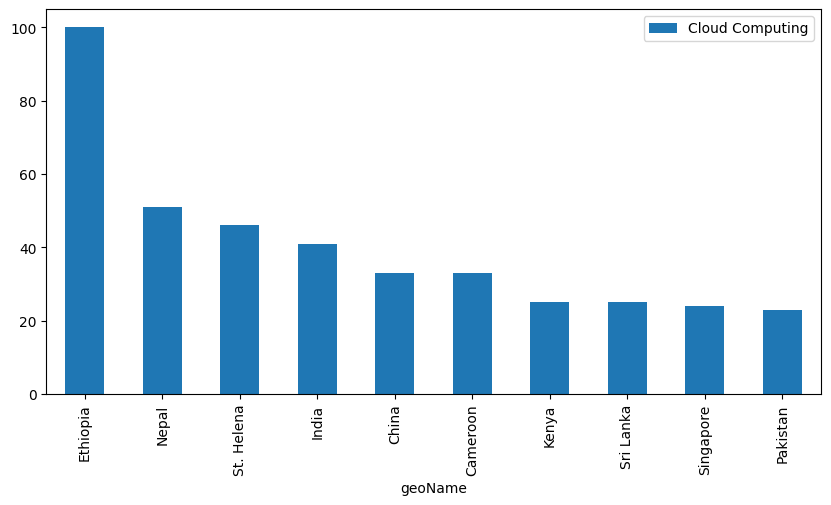

In [7]:
data.reset_index().plot(x='geoName', y='Cloud Computing',
                        figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()


In [11]:
df = Trending_topics.top_charts(2020, hl='en-US',
                                tz=300, geo='GLOBAL')
df.head(10)


,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


In [9]:
try:
    Trending_topics.build_payload(kw_list=['Cloud Computing'])
    related_queries = Trending_topics.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Cloud Computing'")


No related queries found for 'Cloud Computing'


In [10]:
keywords = Trending_topics.suggestions(
  keyword='Cloud Computing')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')


,title,type
0,Cloud computing,Topic
1,Cloud computing security,Topic
2,Cloud computing,Topic
3,Alibaba Cloud,Computer software company
4,Private cloud computing infrastructure,Topic
